# Model Optimisation, Submission and Conclusion

This notebook will be the final notebook in the project. The models will be optimised with the best parameters from the previous notebook. However, the parameters might be tuned so as to make the models more generalised.
The flow of this notebook is as follows:

## Contents
* [Import models and load datasets](#chapter1)
    * [Import models](#chapter1_1)
    * [Load datasets and review](#chapter1_2)
* [Optimise models](#chapter2)
    * [Ada Boost](#chapter2_1)
    * [Logistic Regression](#chapter2_2)
    * [Gradient Boosting](#chapter2_3)
    * [KNN](#chapter2_4)
    * [Random Forest](#chapter2_5)
    * [Decision Tree](#chapter2_6)
* [Cost-Benefit Analysis](#chapter3)   
* [Conclusion](#chapter4)
* [Recommendation](#chapter5)
* [Further Exploration](#chapter6)

## Import models and load datasets <a class="anchor" id="chapter1"></a>

### Import models  <a class="anchor" id="chapter1_1"></a>

In [1]:
# Import models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_auc_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KernelDensity
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm, linear_model, datasets
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn import datasets, metrics

%matplotlib inline

### Load datasets and review  <a class="anchor" id="chapter1_2"></a>

In [2]:
# Load merged test csv file into the notebook
test = pd.read_csv('../dataset/test_final.csv')

In [3]:
# Load merged train csv file into the notebook
train = pd.read_csv('../dataset/train_final.csv')

In [4]:
# Quick review of loaded test dataset
test.head()

,WeekofYear,Sunrise,CULEX PIPIENS,Month,CULEX RESTUANS,DewPoint,Longitude,Tavg,year,ResultSpeed,...,Latitude,CULEX SALINARIUS,StnPressure,CULEX PIPIENS/RESTUANS,CULEX TARSALIS,PrecipTotal,ResultDir,CULEX ERRATICUS,Rela_Humidity,Daylight_Hours
0,24,416,0,6,0,56,-87.800991,74.0,2008,8.9,...,41.95469,0,29.28,1,0,0.0,18,0,59.422796,15.1
1,24,416,0,6,1,56,-87.800991,74.0,2008,8.9,...,41.95469,0,29.28,0,0,0.0,18,0,59.422796,15.1
2,24,416,1,6,0,56,-87.800991,74.0,2008,8.9,...,41.95469,0,29.28,0,0,0.0,18,0,59.422796,15.1
3,24,416,0,6,0,56,-87.800991,74.0,2008,8.9,...,41.95469,1,29.28,0,0,0.0,18,0,59.422796,15.1
4,24,416,0,6,0,56,-87.800991,74.0,2008,8.9,...,41.95469,0,29.28,0,0,0.0,18,0,59.422796,15.1


In [5]:
test.dtypes

WeekofYear                  int64
Sunrise                     int64
CULEX PIPIENS               int64
Month                       int64
CULEX RESTUANS              int64
DewPoint                    int64
Longitude                 float64
Tavg                      float64
year                        int64
ResultSpeed               float64
Station                     int64
CULEX TERRITANS             int64
Latitude                  float64
CULEX SALINARIUS            int64
StnPressure               float64
CULEX PIPIENS/RESTUANS      int64
CULEX TARSALIS              int64
PrecipTotal               float64
ResultDir                   int64
CULEX ERRATICUS             int64
Rela_Humidity             float64
Daylight_Hours            float64
dtype: object

In [6]:
test.shape

(116293, 22)

In [7]:
# Quick review of loaded test dataset
test.head()

,WeekofYear,Sunrise,CULEX PIPIENS,Month,CULEX RESTUANS,DewPoint,Longitude,Tavg,year,ResultSpeed,...,Latitude,CULEX SALINARIUS,StnPressure,CULEX PIPIENS/RESTUANS,CULEX TARSALIS,PrecipTotal,ResultDir,CULEX ERRATICUS,Rela_Humidity,Daylight_Hours
0,24,416,0,6,0,56,-87.800991,74.0,2008,8.9,...,41.95469,0,29.28,1,0,0.0,18,0,59.422796,15.1
1,24,416,0,6,1,56,-87.800991,74.0,2008,8.9,...,41.95469,0,29.28,0,0,0.0,18,0,59.422796,15.1
2,24,416,1,6,0,56,-87.800991,74.0,2008,8.9,...,41.95469,0,29.28,0,0,0.0,18,0,59.422796,15.1
3,24,416,0,6,0,56,-87.800991,74.0,2008,8.9,...,41.95469,1,29.28,0,0,0.0,18,0,59.422796,15.1
4,24,416,0,6,0,56,-87.800991,74.0,2008,8.9,...,41.95469,0,29.28,0,0,0.0,18,0,59.422796,15.1


In [8]:
test.dtypes

WeekofYear                  int64
Sunrise                     int64
CULEX PIPIENS               int64
Month                       int64
CULEX RESTUANS              int64
DewPoint                    int64
Longitude                 float64
Tavg                      float64
year                        int64
ResultSpeed               float64
Station                     int64
CULEX TERRITANS             int64
Latitude                  float64
CULEX SALINARIUS            int64
StnPressure               float64
CULEX PIPIENS/RESTUANS      int64
CULEX TARSALIS              int64
PrecipTotal               float64
ResultDir                   int64
CULEX ERRATICUS             int64
Rela_Humidity             float64
Daylight_Hours            float64
dtype: object

In [9]:
train.shape

(9693, 23)

In [10]:
# Check for differences between train and test data, apart from WnvPresent
set(train.columns).difference(test.columns)

{'WnvPresent'}

In [11]:
set(test.columns).difference(train.columns)

set()

## Optimise models <a class="anchor" id="chapter2"></a>
Based on the 'best' parameters, taken from the previous notebook, the entire test data will be used to train the models. The trained models will then be used to predict the values for the Kaggle submission and scoring. The scores for each model will be published at the end of this section.

In [12]:
# Set data for training models
X = train.drop('WnvPresent', axis = 1)
y = train.WnvPresent

In [13]:
# Get train test split for optimised models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42 )

In [14]:
X_train_columns = X_train.columns

In [15]:
# Check on data dimensions
print(X_train.shape)
print(y_train.shape)

(6785, 22)
(6785,)


In [16]:
# To scale features
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [17]:
#use smote to deal with imbalanced classes
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_sample(X_train_ss, y_train)

### Ada Boost <a class="anchor" id="chapter2_1"></a>

In [18]:
# Instantiate Ada Boost
best_ada = AdaBoostClassifier(n_estimators = 600, learning_rate = 1)
best_ada.fit(X_train_sm, y_train_sm)
preds_ada = best_ada.predict(X_test_ss)

In [19]:
pred_proba = [i[1] for i in best_ada.predict_proba(X_test_ss)]

In [20]:
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

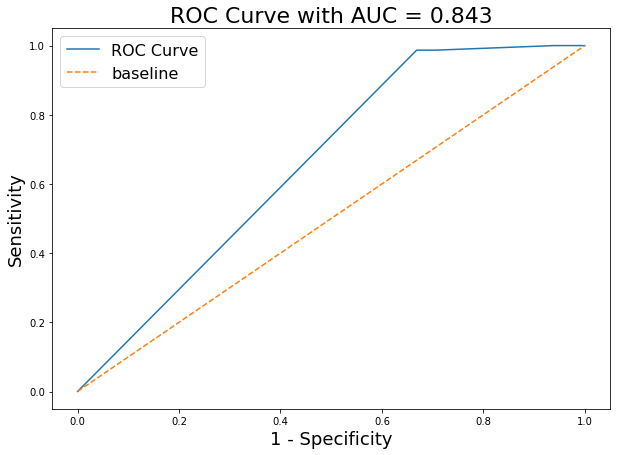

In [21]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

### Logistic Regression <a class="anchor" id="chapter2_2"></a>

In [22]:
# Instantiate Logistic Regression
best_lr = LogisticRegression(penalty = 'l2', solver = 'liblinear')
best_lr.fit(X_train_sm, y_train_sm)
preds_lr = best_lr.predict(X_test_ss)

In [23]:
pred_proba = [i[1] for i in best_lr.predict_proba(X_test_ss)]

In [24]:
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

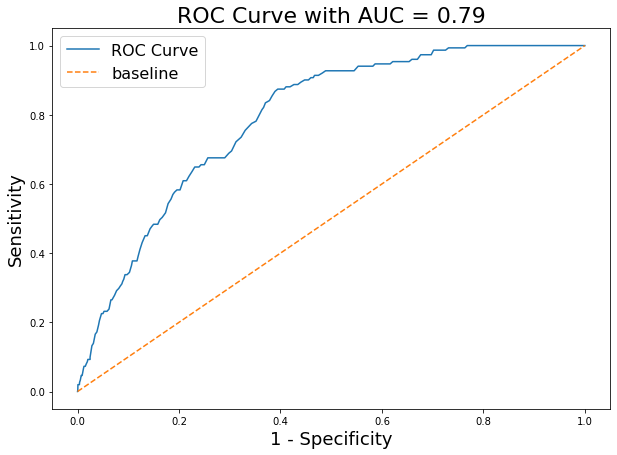

In [25]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

### Gradient Boosting <a class="anchor" id="chapter2_3"></a>

In [26]:
# Instantiate GradientBoosting
best_gbc = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 50)
best_gbc.fit(X_train_sm, y_train_sm)
preds_gbc = best_gbc.predict(X_test_ss)

In [27]:
pred_proba = [i[1] for i in best_gbc.predict_proba(X_test_ss)]

In [28]:
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

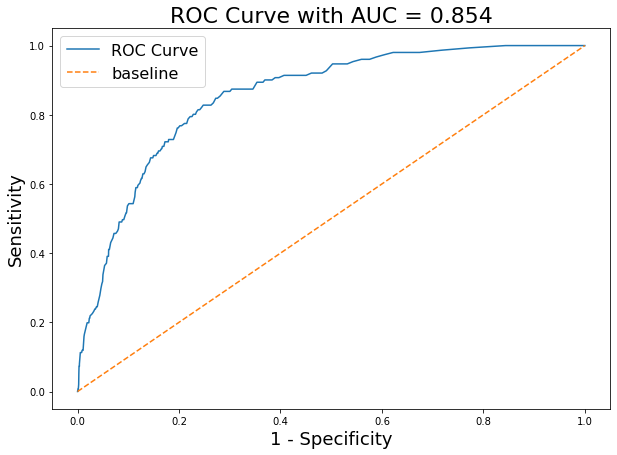

In [29]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

### KNN  <a class="anchor" id="chapter2_4"></a>

In [30]:
# Instantiate K Nearest Neighbours
best_knn = KNeighborsClassifier()
best_knn.fit(X_train_sm, y_train_sm)
preds_knn = best_knn.predict(X_test_ss)

In [31]:
pred_proba = [i[1] for i in best_knn.predict_proba(X_test_ss)]

In [32]:
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

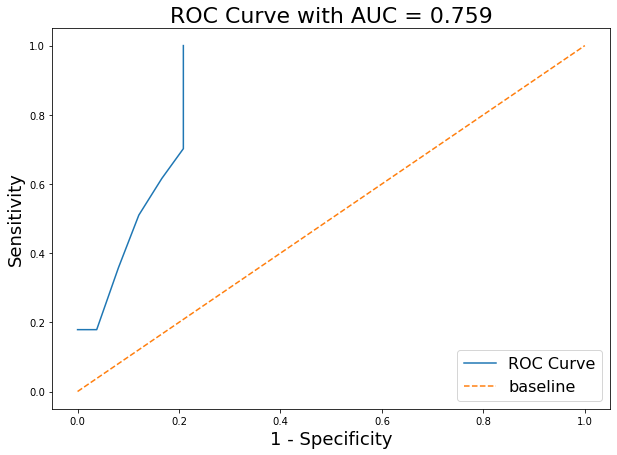

In [33]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

### Random Forest  <a class="anchor" id="chapter2_5"></a>

In [34]:
# Instantiate Random forest
best_rf = RandomForestClassifier(class_weight = 'balanced',
                                 min_samples_leaf = 5,
                                 min_samples_split = 3,
                                 n_estimators = 300)
# best_rf = RandomForestClassifier()
best_rf.fit(X_train_sm, y_train_sm)
preds_rf = best_rf.predict(X_test_ss)

In [35]:
pred_proba = [i[1] for i in best_rf.predict_proba(X_test_ss)]

In [36]:
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

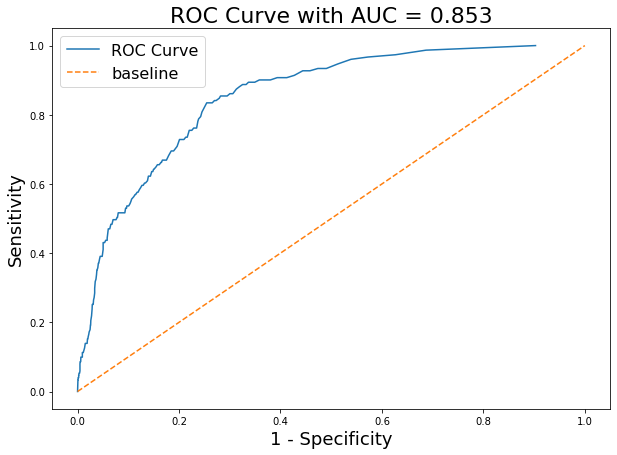

In [37]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

### Decision Tree  <a class="anchor" id="chapter2_6"></a>

In [38]:
# Instantiate Decision Tree
best_dt = DecisionTreeClassifier(class_weight= 'balanced',
                                 max_depth= 16,
                                 max_features = 'auto',
                                 min_samples_leaf = 4,
                                 min_samples_split = 2,
                                 random_state = 42)
best_dt.fit(X_train_sm, y_train_sm)
preds_dt = best_dt.predict(X_test_ss)

In [39]:
pred_proba = [i[1] for i in best_dt.predict_proba(X_test_ss)]

In [40]:
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

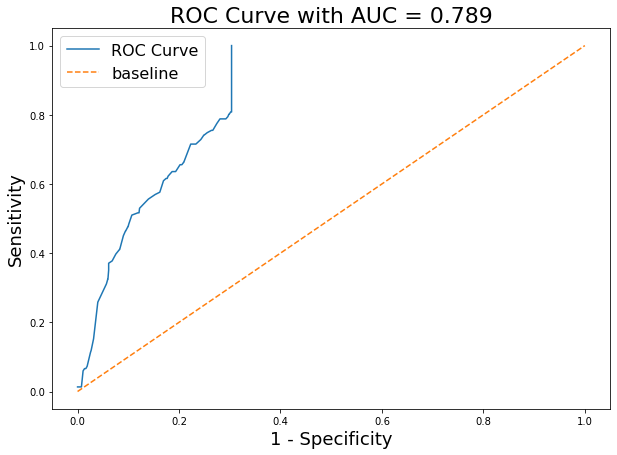

In [41]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

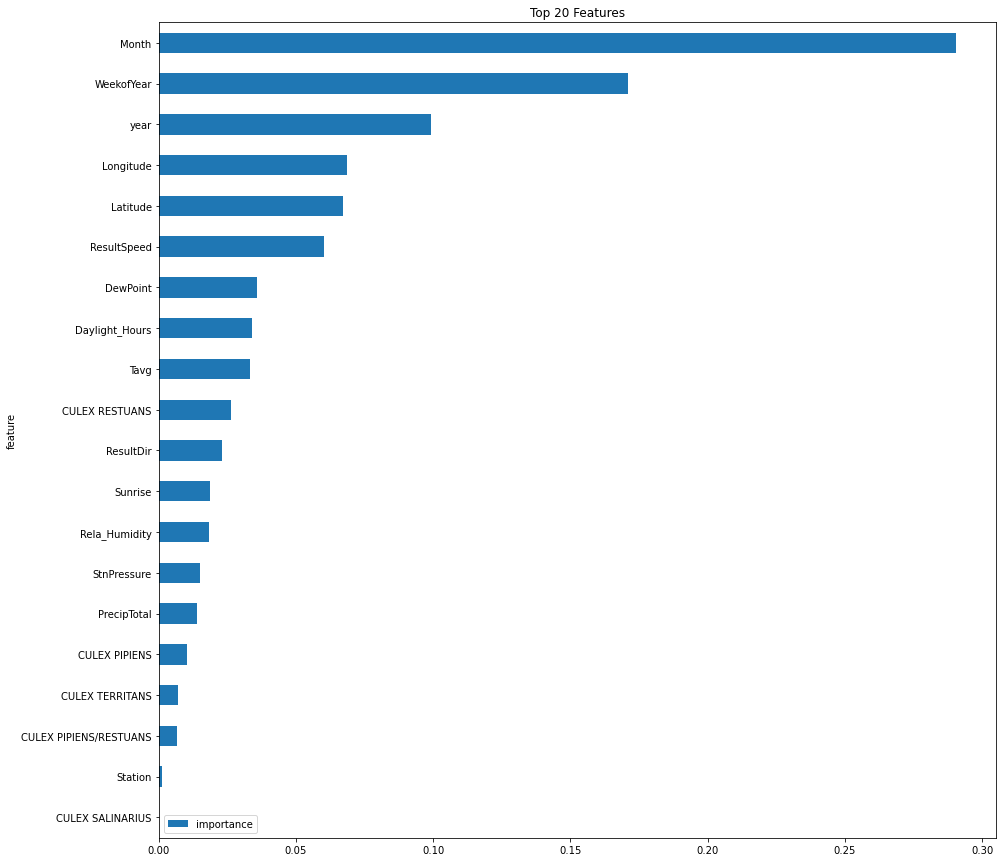

In [42]:
feat_impt = pd.DataFrame({'feature': X_train_columns, 
                         'importance': best_gbc.feature_importances_}).sort_values(by = 'importance', ascending=True).tail(20)

feat_impt.plot.barh('feature', 'importance', figsize = (15,15))
plt.title('Top 20 Features');

Top features for West Nile Virus inlcudes:

* Month
* Week of Year
* Longitude and Latitude
* ResultantSpeed(Wind speed and direction)
* Culex Restuans
* Culex Pipiens
* Culex Territans
* Daylight Hours
* Average Temperature

Based on the AUC ROC scores, the gradient boosting model has the best score and will be used.

In [43]:
# Prepare file for submission
gbc_submission = pd.DataFrame(preds_gbc)
gbc_submission.columns = ['wnvpresent']
gbc_submission.insert(0, 'Id', range(1, 1 + len(gbc_submission)))
gbc_submission.to_csv("../submissions/gbc_submission.csv", index = False)

No handles with labels found to put in legend.


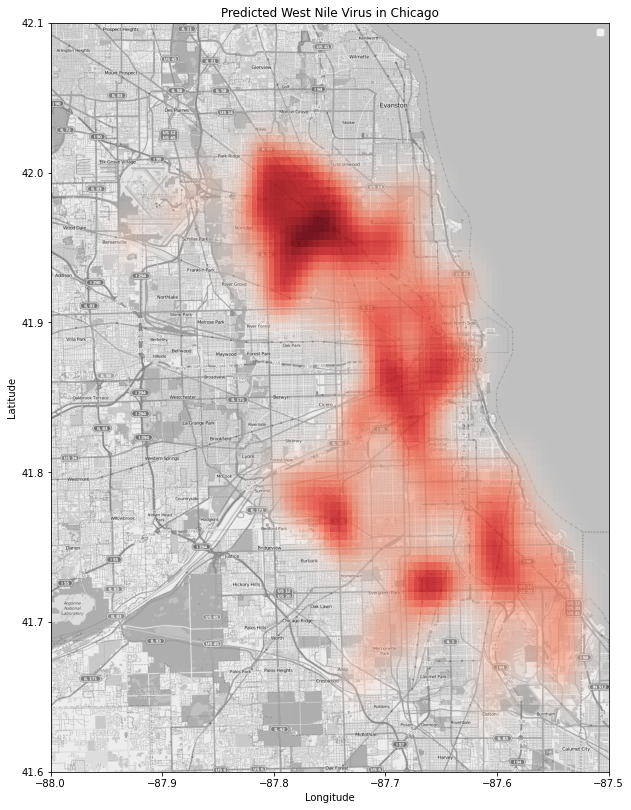

In [51]:
#credit: https://github.com/vijayswamy89/WestNileVirusPredictionsInChicago/blob/master/WestNileVirusPredictions.ipynb
#create df with predictions and lat and lon
predict_loc = X_test.loc[:,['Latitude','Longitude']]
predict_loc['wnv_pred'] = preds_gbc

#load map
mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")
alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

sightings = predict_loc[predict_loc['wnv_pred'] > 0.5]
sightings = sightings.groupby(['Longitude', 'Latitude']).max()['wnv_pred'].reset_index()
V = sightings[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.015)
kd.fit(V)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

#kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv, origin='lower', cmap=alpha_cm, extent=lon_lat_box, aspect=aspect)


plt.title('Predicted West Nile Virus in Chicago')
plt.legend(frameon=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('predicted_heatmap.png')

Our model predicted areas in red corresponds with areas of high concentration of West Nile Virus and these are the areas that we should focus vector control measures at.

## Cost-Benefit Analysis <a class="anchor" id="chapter3"></a>

To provide an initial background, the West Nile Virus has been prevalent in the United States since it first emerged in New York in 1999. Since then, it has spread across the other 48 states and has cost United States about \\$800 million reported in 2014, which is about \\$57 million each year, which does not include vector control.  

The two main methods that most local authorities adopt for widespread control of mosquitos are **aerial and truck-mounted spraying.**  
**Aerial Spraying**  
Advantages  
* Every type of mosquito would be affected quicker, including the Culex mosquitos, which primarily reside high in the trees 
* Helicopter spraying also allows for most of the target areas to be reached. EM is able to spray 95% of the targeted areas

Disadvantages  
* Expensive: The price of a single helicopter starts at \\$100000 with operating costs of \\$80000 per year  

**Truck Mounted Spraying**  
Advantages 
* Cheaper: A single truck with sprayer can cost \\$20,000 to \\$25,000 with an operating cost of \\$20,000 per year  

Disadvantages  
* Not as effective as aerial spraying because truck spraying cannot reach all areas and takes longer to treat a given area.

Zooming in on **Sacramento County California in 2005**, 163 human cases were reported which prompted an emergency aerial spray by local authorities. The spray was conducted over 6 nights, over an area of 477km2.
Costs amounted to approximately \\$701,790 which includes spray procedures and labour costs. 

As the size of Chicago city is approximately 606km2, the cost will be estimated to be roughly the same or less, considering that only certain hotspots will be targeted.  

The total cost of the 2005 Sacramento County WNV epidemic was around \\$2,979,037. Costs for treating patients alone exceeded costs of emergency vector control by \\$1,438,619, a ratio of 3:1. This difference suggests that for the benefits of the vector control to outweigh the cost of the epidemic, the spray event would need to prevent only 15 cases.

In terms of efficacy of the spray conducted, greatest mortality was encountered in cages placed in open fields (100% in each cage), whereas the lowest rates occurred in sentinel cages placed along the bank of a dry creek under dense canopy and between buildings of a residential site.

Overall mortality among mosquitoes placed in exposed or partially exposed sites (77.1%) was significantly higher than mortality
of mosquitoes placed in protected places (24.9%)

In summary, results indicated that the aerial spraying of pyrethrin in north Sacramento significantly reduced mosquito abundance and the number of infective bites received by human population. There were no new human WNV cases in either of the treated areas, whereas 18 new cases occurred in adjacent untreated areas in Sacramento County.

Of course, if local authorities do proceed with the pesticide spraying, we do have to recognise the long-term adverse health effects that it may have on public health. 

* National Research Council found that pregnant women and children have a greater risk of getting sick from pesticides.  
* In NYC in 2000 more people were reported to have gotten sick from pesticide exposure from spraying than from WNV.  
* New York State Department of Health states that adverse outcomes during or after an aerial or ground spraying of adulticides might include acute asthma attacks, other respiratory problems, and/or dermatological problems.

Sources:  
[Economic Cost Analysis of West Nile Virus Outbreak, Sacramento County, California, USA, 2005](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3322011/#:~:text=The%20total%20economic%20impact%20of%20WNV%20was%20%242.98%20million.)  
[The High Cost Of Treating People Hospitalized With West Nile Virus](https://www.npr.org/sections/health-shots/2014/02/11/275262857/the-high-cost-of-treating-people-hospitalized-with-west-nile-virus#:~:text=The%20result%3F,%24678%20million%20to%20%241.01%20billion.)  
[Impact of Aerial Spraying of Pyrethrin Insecticide on Culex pipiens and Culex tarsalis (Diptera: Culicidae) Abundance and West Nile Virus Infection Rates in an Urban/Suburban Area of Sacramento County, California](https://www.researchgate.net/publication/23182100_Impact_of_Aerial_Spraying_of_Pyrethrin_Insecticide_on_Culex_pipiens_and_Culex_tarsalis_Diptera_Culicidae_Abundance_and_West_Nile_Virus_Infection_Rates_in_an_UrbanSuburban_Area_of_Sacramento_County_Cal#pf2)  
[Economic Burden of West Nile Virus in the United States](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3945680/)
[Integrated Pest Management for Mosquito Control in Massachusetts](https://web.wpi.edu/Pubs/E-project/Available/E-project-040713-135959/unrestricted/MQP_-_Paper_-_April_7th_Edition.pdf)

## Conclusion <a class="anchor" id="chapter4"></a>

**Gradient Boost Classifier** scored the best score in Kaggle as well as on test set. It achieved a score of 85.4% accuracy to predict pressence of virus. The classifer also has the least variance between test and training scores proving that it is not overfit.<br>
Based on feature importance it is evident that the virus is prevalent in certain locations (latitude and logitude has high importance), where certain species of the mosquitoes grow.<br>
Year, month and week of the year as well as some weather features such as resultant wind speed and average temperature are also seen to be influencing the presence of WN Virus. It is in line with our research, higher temperatures and wind conditions do affect pressence of mosquitoes <br>
These features can be used to determine the locations/ traps and decide when and where to concentrate on spraying efforts.  
**Model Limitations**<br>
Model did not perform well on the out of sample set from Kaggle and there is a significant variance in AUC score between the 2 scores. This may be due to the way the in sample training and test sets are split vs. the train and test set split that Kaggle did.<br>  

As per our cost benefit analysis, it would be a better choice to proceed with the vector control measures like aerial spraying as the benefits clearly outweigh the costs


## Recommendation <a class="anchor" id="chapter5"></a>

Our recommendation is to proceed to conduct the vector control measures as explained above. 

Some areas that we can focus on to make the control measure effective are:
* Focus on areas our model predict are likely to have pressence of West Nile Virus
* Areas where mosquito species like Culex Restuans, Culex Pipiens and Culex Territansare most commonly found
* Certain time of the year where temperatures are warmer and windier like in the Summer

However, due to the long term detrimental effects of pesticide spraying, we reccomend this as a last resort where the virus is getting too out of hand. 

Instead, local authorities should foucs on public education that would prevent the virus from ever happening in the first place.
Good habits that can be taught to the public include:
* Remove all potential breeding areas – any place with standing or slow-moving water such as buckets, holes in trees, clogged gutters and down spouts, old tires.  
* Monitor ponds and sources of water regularly for signs of mosquito larvae.  
* Stock permanent water pools or ponds with fish that eat mosquito larvae and pupae.  

## Further Exploration <a class="anchor" id="chapter6"></a>

Enhance the model with additional feature engineering and time series application.<br>
NumMosquito feature from train set that had high correlation to virus presence was dropped to align training set with out of sample set. There is opportunity to predict NumMosquito feature first using regression and then predict presence of WNV since the 2 are highly correlated.<br>
Spray dataset was completely dropped from modeling due to lack of information for years other than 2013. Would be worthwhile to include spray information provided adequate data is available.